# **Creating DataFrames**

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame({"a":[4,5,6],"b":[7,8,9],"c":[10,11,12]},index = [1,2,3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [31]:
df = pd.DataFrame([[4,7,10],[5,8,11],[6,9,12]],index = [1,2,3],columns = ['a','b','c'])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [32]:
df = pd.DataFrame({"a":[4,5,6],"b":[7,8,9],"c":[10,11,12]}, index = pd.MultiIndex.from_tuples([('d',1),('d',2),('e',2)], names = ['n','v']))
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

# **Reshaping Data**

In [33]:
pd.melt(df)


,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


In [34]:
df2 = (pd.melt(df).rename(columns = {'variable':'var','value':'val'}).query('val >= 200'))
df2.pivot(columns='var',values = 'val')

var


In [35]:
pd.concat([df,df2])

a    b     c  var  val
n v                          
d 1  4.0  7.0  10.0  NaN  NaN
  2  5.0  8.0  11.0  NaN  NaN
e 2  6.0  9.0  12.0  NaN  NaN

In [36]:
pd.concat([df,df2],axis = 1)

a  b   c  var  val
d 1  4  7  10  NaN  NaN
  2  5  8  11  NaN  NaN
e 2  6  9  12  NaN  NaN

In [37]:
df.drop(columns='b')

a   c
n v       
d 1  4  10
  2  5  11
e 2  6  12

In [45]:
df.rename(columns={'a':'colA','b':'colB','c':'colC'})

colA  colB  colC
n v                  
d 1     4     7    10
  2     5     8    11
e 2     6     9    12

In [38]:
df.sort_values('a')

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [39]:
df.sort_values('a', ascending = False)

a  b   c
n v          
e 2  6  9  12
d 2  5  8  11
  1  4  7  10

In [40]:
df.sort_index()

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [41]:
df.reset_index()

,n,v,a,b,c
0,d,1,4,7,10
1,d,2,5,8,11
2,e,2,6,9,12


# **Method Chaining**

In [48]:
bla = (pd.melt(df).rename(columns = {'variable':'var','value':'val'}).query('val >= 200'))
bla

,var,val


# **SUBSET OBSERVATIONS-ROWS**

In [58]:
df=pd.DataFrame({"a":[4,5,6],"b":[7,8,9],"c":[10,11,12]},index = [1,2,3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [59]:
df[df.a > 4]

,a,b,c
2,5,8,11
3,6,9,12


In [60]:
df.drop_duplicates()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [63]:
df.sample(frac = 0.5)

,a,b,c
3,6,9,12
2,5,8,11


In [67]:
df.nlargest(2,'c')

,a,b,c
3,6,9,12
2,5,8,11


In [68]:
df.nsmallest(2,'c')

,a,b,c
1,4,7,10
2,5,8,11


In [69]:
df.head(2)

,a,b,c
1,4,7,10
2,5,8,11


In [70]:
df.tail(2)

,a,b,c
2,5,8,11
3,6,9,12


# **SUBSET VARIABLES - COLUMNS**

In [72]:
df[['b','c']]

,b,c
1,7,10
2,8,11
3,9,12


In [76]:
df['c']

1    10
2    11
3    12
Name: c, dtype: int64

In [78]:
df.filter(regex='regex')

""
1
2
3


# **USING QUERY**

In [80]:
df.query('a>4')

,a,b,c
2,5,8,11
3,6,9,12


In [81]:
df.query('a>4' and 'b>6')

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


SUBSETS - ROWS AND COLUMNS

In [84]:
df.loc[:]

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [85]:
df.iloc[:]

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [87]:
df.loc[:,'x2':'x4']

""
1
2
3


In [89]:
df.loc[df['a'] > 1 , ['a','c']]

,a,c
1,4,10
2,5,11
3,6,12


In [90]:
df.iat[1,2]

11

In [91]:
df.at[2,'b']

8

# SUMMARIZING DATA

In [92]:
df['b'].value_counts()

7    1
8    1
9    1
Name: b, dtype: int64

In [93]:
len(df)

3

In [94]:
df.shape

(3, 3)

In [95]:
df['a'].nunique()

3

In [96]:
df.describe()

,a,b,c
count,3.0,3.0,3.0
mean,5.0,8.0,11.0
std,1.0,1.0,1.0
min,4.0,7.0,10.0
25%,4.5,7.5,10.5
50%,5.0,8.0,11.0
75%,5.5,8.5,11.5
max,6.0,9.0,12.0


In [97]:
df.sum()

a    15
b    24
c    33
dtype: int64

In [98]:
df.count()

a    3
b    3
c    3
dtype: int64

In [99]:
df.median()

a     5.0
b     8.0
c    11.0
dtype: float64

In [101]:
df.quantile([0.25,0.75])

,a,b,c
0.25,4.5,7.5,10.5
0.75,5.5,8.5,11.5


In [103]:
df.apply(sum)

a    15
b    24
c    33
dtype: int64

In [104]:
df.min()

a     4
b     7
c    10
dtype: int64

In [105]:
df.max()

a     6
b     9
c    12
dtype: int64

In [106]:
df.mean()

a     5.0
b     8.0
c    11.0
dtype: float64

In [107]:
df.var()

a    1.0
b    1.0
c    1.0
dtype: float64

In [108]:
df.std()

a    1.0
b    1.0
c    1.0
dtype: float64

# **GROUP DATA**

In [115]:
df.groupby(by='a')

In [145]:
df.shift(1)

,a,b,c,Volume
1,NaN,NaN,NaN,NaN
2,4.0,7.0,10.0,280.0
3,5.0,8.0,11.0,440.0


In [146]:
df.rank(method = 'dense')

,a,b,c,Volume
1,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0


In [147]:
df.rank(method = 'min')

,a,b,c,Volume
1,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0


In [148]:
df.rank(pct=True)

,a,b,c,Volume
1,0.333333,0.333333,0.333333,0.333333
2,0.666667,0.666667,0.666667,0.666667
3,1.000000,1.000000,1.000000,1.000000


In [149]:
df.rank(method ='first')

,a,b,c,Volume
1,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0


In [150]:
df.shift(-1)

,a,b,c,Volume
1,5.0,8.0,11.0,440.0
2,6.0,9.0,12.0,648.0
3,NaN,NaN,NaN,NaN


In [151]:
df.cumsum()

,a,b,c,Volume
1,4,7,10,280
2,9,15,21,720
3,15,24,33,1368


In [152]:
df.cummax()

,a,b,c,Volume
1,4,7,10,280
2,5,8,11,440
3,6,9,12,648


In [153]:
df.cummin()

,a,b,c,Volume
1,4,7,10,280
2,4,7,10,280
3,4,7,10,280


In [154]:
df.cumprod()

,a,b,c,Volume
1,4,7,10,280
2,20,56,110,123200
3,120,504,1320,79833600


## **HANDLING MISSING DATA**

In [125]:
df.dropna()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [126]:
df.fillna(2)

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


## **MAKE NEW COLUMNS**

In [130]:
df.assign(Area=lambda df:df.b*df.c)

,a,b,c,Area
1,4,7,10,70
2,5,8,11,88
3,6,9,12,108


In [132]:
df['Volume'] = df.a*df.b*df.c
df

,a,b,c,Volume
1,4,7,10,280
2,5,8,11,440
3,6,9,12,648


In [136]:
pd.qcut(df.a , 2 , labels = False)

1    0
2    0
3    1
Name: a, dtype: int64

In [140]:
df.max(axis=1)

1    280
2    440
3    648
dtype: int64

In [141]:
df.min(axis=1)

1    4
2    5
3    6
dtype: int64

In [142]:
df.clip(lower=-10,upper=10)

,a,b,c,Volume
1,4,7,10,10
2,5,8,10,10
3,6,9,10,10


In [143]:
df.abs()

,a,b,c,Volume
1,4,7,10,280
2,5,8,11,440
3,6,9,12,648


# **COMBINE DATA SETS**

In [156]:
adf = pd.DataFrame({'a' : [1,2,3],'b' : [4,5,6],'c' : [7,8,9]})
adf

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [159]:
bdf = pd.DataFrame({'a' : [10,11,12], 'b' : [13,14,15], 'c' : [16,17,18]})
bdf

,a,b,c
0,10,13,16
1,11,14,17
2,12,15,18


In [160]:
pd.merge(adf,bdf, how='left',on='a')

,a,b_x,c_x,b_y,c_y
0,1,4,7,NaN,NaN
1,2,5,8,NaN,NaN
2,3,6,9,NaN,NaN


In [161]:
pd.merge(adf,bdf,how='right', on = 'a')

,a,b_x,c_x,b_y,c_y
0,10,NaN,NaN,13,16
1,11,NaN,NaN,14,17
2,12,NaN,NaN,15,18


In [162]:
pd.merge(adf,bdf,how='inner',on = 'a')

,a,b_x,c_x,b_y,c_y


In [163]:
pd.merge(adf,bdf,how='outer',on='a')

,a,b_x,c_x,b_y,c_y
0,1,4.0,7.0,NaN,NaN
1,2,5.0,8.0,NaN,NaN
2,3,6.0,9.0,NaN,NaN
3,10,NaN,NaN,13.0,16.0
4,11,NaN,NaN,14.0,17.0
5,12,NaN,NaN,15.0,18.0


In [164]:
adf[adf.a.isin(bdf.a)]

,a,b,c


In [165]:
adf[~adf.a.isin(bdf.a)]

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [167]:
ddf = pd.DataFrame({'a' : [10,11,12], 'b' : [13,14,15], 'c' : [16,17,18]})
ddf

,a,b,c
0,10,13,16
1,11,14,17
2,12,15,18


In [168]:
cdf = pd.DataFrame({'b' : [13,14,15], 'c' : [16,17,18], 'd' : [19,20,21]})
cdf

,b,c,d
0,13,16,19
1,14,17,20
2,15,18,21


In [169]:
pd.merge(cdf,ddf)

,b,c,d,a
0,13,16,19,10
1,14,17,20,11
2,15,18,21,12


In [170]:
pd.merge(cdf,ddf,how='outer')

,b,c,d,a
0,13,16,19,10
1,14,17,20,11
2,15,18,21,12


In [171]:
pd.merge(cdf,ddf,how='outer',indicator = True)

,b,c,d,a,_merge
0,13,16,19,10,both
1,14,17,20,11,both
2,15,18,21,12,both


# **Windows**

In [175]:
df.expanding()

Expanding [min_periods=1,center=False,axis=0,method=single]

In [176]:
df.rolling(2)

Rolling [window=2,center=False,axis=0,method=single]

Plotting

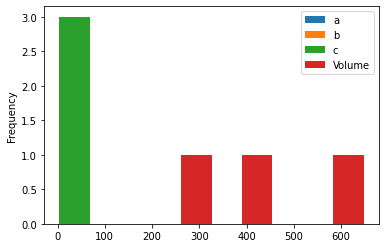

In [177]:
df.plot.hist()

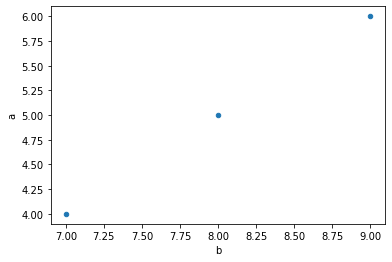

In [182]:
df.plot.scatter(x='b',y='a')